<h1>Lab 17:<br>Measuring Equipotential Surfaces</h1>
<h2>Introduction</h2>
In this lab we will measure the equipotential surfaces from two arrangements of conductors, shown below:

<h2>Geometry One</h2>

![](image1.png)

<h2>Geometry Two</h2>

![](image2.png)

<h2>Theory</h2>
In order to calculate what the equipotential surfaces such look like we need the potential from a line charge. The geometry is shown below. The line is assumed to have length L and is centered with respect to the x axis. The piece in red is a small charge element dq which is a distance s from the origin   The potential from this element is  $dV=dq/(4 \pi \epsilon_0 r)$

The distance $r$ is given by $r = \sqrt{x^2 + (y-s)^2}$ and $dq = \lambda ds$ where $\lambda = \frac{Q}{L}$ is the linear charge density. The potential due to the line charge is the integral of $dV$ over the full range of $ds$ from $\frac{-L}{2}$ to$ \frac{+L}{2}$

![](image3.png)

In [25]:
import sympy as sym

x, s, y, L, Q, π, ϵ0, d = sym.symbols('x s y L Q π ϵ0 d')

VLine = (Q/L) * (1/4*π*ϵ0) * sym.integrate(1/(sym.sqrt(x**2 + (y-s)**2)), s).subs({s: L/2}) - sym.integrate(1/(sym.sqrt(x**2 + (y-s)**2)), s).subs({s: -L/2})
VLine

-asinh((-L/2 - y)/x) + 0.25*Q*π*ϵ0*asinh((L/2 - y)/x)/L

The potential due to the two oppositely charged line charges which are seperated by a distance d is

In [26]:
VTotal = VLine - VLine.subs({x: x - d})
VTotal

-asinh((-L/2 - y)/x) + asinh((-L/2 - y)/(-d + x)) + 0.25*Q*π*ϵ0*asinh((L/2 - y)/x)/L - 0.25*Q*π*ϵ0*asinh((L/2 - y)/(-d + x))/L

We can plot the equipotential surfaces with a contour plot.

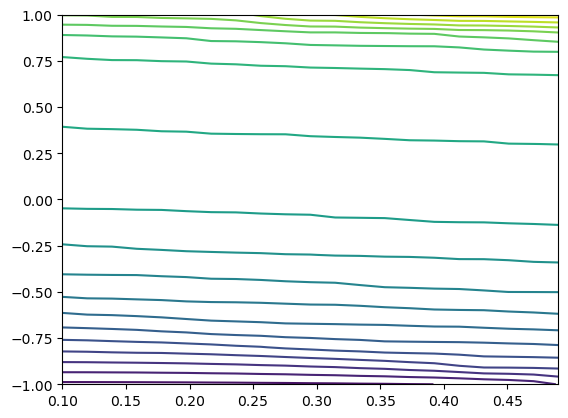

In [104]:
from matplotlib import pyplot as plt
import numpy as np

X = np.linspace(0.1, 0.49, 21)
Y = np.linspace(-1, 1, 21)

xx, yy = np.meshgrid(X,Y)

Z = [VTotal.subs({L: 2, Q: 4*np.pi, x: i, y: j, π: np.pi, d: 1/2, ϵ0: 1}) for i in X for j in Y]

Z = np.asarray(Z).astype(float)
Z=np.sort(np.unique(Z)).reshape(xx.shape)

plt.contour(xx, yy, Z, levels=20)

#mysteriously sideways
plt.show()

 We can also draw in our line charges.

To compute the equipotential surfaces from the second device we add the potential due to a point charge to the from a line charge.

In [106]:
VTotal2 = VLine - Q/((4*π*ϵ0) * ((x-d)**2+y**2)**2)
VTotal2

-Q/(4*π*ϵ0*(y**2 + (-d + x)**2)**2) - asinh((-L/2 - y)/x) + 0.25*Q*π*ϵ0*asinh((L/2 - y)/x)/L

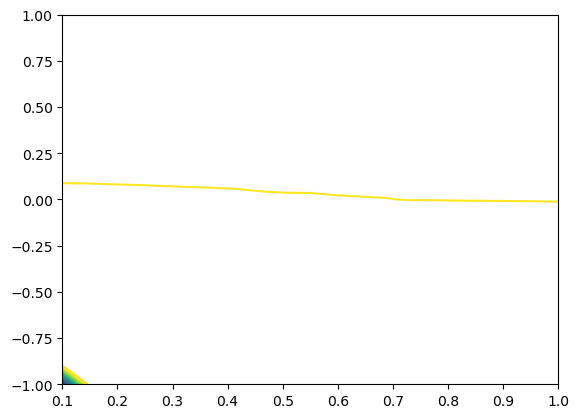

In [115]:
X2 = np.linspace(0.1, 1, 21)
Y2 = np.linspace(-1, 1, 21)

xx2, yy2 = np.meshgrid(X2,Y2)

Z2 = [VTotal2.subs({L: 2, Q: 4*np.pi, x: i, y: j, π: np.pi, d: 1/2, ϵ0: 1}) for i in X2 for j in Y2]

Z2 = np.asarray(Z2).astype(float)
Z2 =np.sort(np.unique(Z2)).reshape(xx2.shape)

plt.contour(xx2, yy2, Z2, levels=200)

#mysteriously sideways
plt.show()

<h2>Experimental Method</h2>
You will make the conductors depicted above by painting on conducting paper with silver paint using the provided templates. The black paper is paper with carbon in it and it is a poor conductor. The paint contains silver and is a very good conductor. Cut the black paper in half and paint the two geometries shown below onto the paper. The conducting paper is a good enough conductor to make a complete circuit but a poor enough conductor so that the charges will leak off the silver only very slowly.<br><br>
The black lines are leads and should be painted as thin lines. Paint them to the edge of the paper.
<br><br>
Test your conductors with the multimeter to make sure that they are conducting. The resistance should be a few Ohms or less.  Put a piece of carbon paper under the conductive paper and put a piece of tracing paper under the carbon paper. Hold the three pieces of paper together with paper clips. Attach alligator clips to the end of the two leads and use the power supply to put 15 volts across the conductors. Now use the probes of the multimeter to find the equipotential surfaces. 
<br><br>
To find the five volt line, for example, place one probe on one of the conductors and move the second probe lightly across the paper until the multimeter reads 5 volts. Then press down hard with the probe so that you make a mark on the carbon paper. (<u>Make sure that you hold the probe vertically so that you are measuring only the potential at the tip.</u>) Continue this way moving the probe across the region between the conductors pressing down each time you get five volts. Do this for three or four different potential surfaces. Now look at your tracing paper and connect the dots for each potential surface. This will give you the  equipotential surfaces (or at least three or four of them).
<br><br>
Do the same thing for the second conductor.
<h2>The Effect of the Leads</h2>
The leads that you painted on will have an effect on the equipotential surfaces. The leads are just lines of charge so we can use our function VLine to compute the effects of the leads noting that the name of the position variables in VLine are switched for horizontal vs. vertical lines. The total potential for the plate capacitor-like arrangement is then:

<h2>Upshot</h2>
This is a rough outline of the experiment.  This is not necessarily a complete list of what needs to be done.
<br><br>
1) Paint the conductor geometries shown above using silver paint on carbon paper.<br>
2) Test the conductivity of the paper.  Is it perfect?  Hint: What are the uncertainties due to the assumption of a perfect conductor?<br>
3) Map the equipotential surfaces for both geometries using the multimeters.  How well do they match to the theoretical predictions above?<br>
4) The "data" for this lab is essentially a map of the equipotential surfaces for these geometries, and the "theory" is the model above.  Import images of the conductive paper and use them in your final report.  You will have to think carefully about the quantitative uncertainties of this lab. 
<br>
(E.g. To what extent are you sure you found exactly the 5V line?  Might there be some fluctuation from point to point?  What is the size of the "wiggles"?)


<h2>Assignment</h2>
The assignment for Week 17 is a <u>full Lab Report</u> which addresses all relevant questions and results from this writeup, and reflects on each.  This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.